In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
#https://www.kaggle.com/izzettunc/introduction-to-time-series-clustering


In [126]:
df = pd.read_csv("2105 Data Science Campaign Optimization facebook_ad_hourly_v01.csv", sep=';')
# dropping unnecessary columns
df = df.drop(["Unnamed: 0", 'reach'],axis=1)
df.head()

,campaign_id,ad_id,date,time,spend,impressions,clicks,purchase
0,23843490210650549,23843490222550549,2019-07-18,07:00:00 - 07:59:59,0.04,6,0,NaN
1,23843490210650549,23843490222600549,2019-07-18,07:00:00 - 07:59:59,0.00,2,0,NaN
2,23843490210650549,23843490222650549,2019-07-18,07:00:00 - 07:59:59,0.00,1,0,NaN
3,23843490210650549,23843490222880549,2019-07-18,07:00:00 - 07:59:59,0.04,5,0,NaN
4,23843490224560549,23843490225720549,2019-07-18,07:00:00 - 07:59:59,0.01,1,0,NaN


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54314 entries, 0 to 54313
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   campaign_id  54314 non-null  int64  
 1   ad_id        54314 non-null  int64  
 2   date         54314 non-null  object 
 3   time         54314 non-null  object 
 4   spend        54314 non-null  float64
 5   impressions  54314 non-null  int64  
 6   clicks       54314 non-null  int64  
 7   purchase     388 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 3.3+ MB


In [128]:
# Replace None in the purchase value to 0
df['purchase'] = df['purchase'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54314 entries, 0 to 54313
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   campaign_id  54314 non-null  int64  
 1   ad_id        54314 non-null  int64  
 2   date         54314 non-null  object 
 3   time         54314 non-null  object 
 4   spend        54314 non-null  float64
 5   impressions  54314 non-null  int64  
 6   clicks       54314 non-null  int64  
 7   purchase     54314 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 3.3+ MB


In [129]:
#convert date and extract features
df['date'] = pd.to_datetime(df['date'])
df['hour'] = pd.to_datetime(df['time'].apply(lambda x: str(x).split('-')[0].strip()), format='%H:%M:%S').dt.hour
df['datetime'] = df['date']
df['datetime']+=  pd.to_timedelta(df.hour, unit='h')

# df['month'] = df['date'].dt.dayofweek # 0 is monday
# df['year'] = df['date'].dt.year
# df["quarter"] = df['month'] // 4 + 1

# #valid features with month column
# df['dayofweek'] = df['date'].dt.dayofweek
# df['dayofyear'] = df['date'].dt.dayofyear
# df['hour'] = pd.to_datetime(df['time'].apply(lambda x: str(x).split('-')[0].strip()), format='%H:%M:%S').dt.hour

## Get valid Time series data

In [130]:
# combine store and item column as time_series
df['campaign_id'] = ['campaign_id_' + str(i) for i in df['campaign_id']]
df['ad_id'] = ['ad_id_' + str(i) for i in df['ad_id']]
df['time_series'] = df[['campaign_id', 'ad_id']].apply(lambda x: '_'.join(x), axis=1)
df.drop(['campaign_id', 'ad_id'], axis=1, inplace=True)

In [251]:
time_series_first_24hr = df[['time_series','datetime']].sort_values(['datetime']).groupby('time_series').first().reset_index()
time_series_first_24hr['last_hour'] = time_series_first_24hr['datetime']+ timedelta(hours=23)
time_series_first_24hr = time_series_first_24hr.rename(columns={'datetime':'first_hour'})
time_series_first_24hr ['valid_series'] = time_series_first_24hr['last_hour']<df['datetime'].max()
time_series_first_24hr = time_series_first_24hr[time_series_first_24hr.valid_series>0]
time_series_first_24hr = time_series_first_24hr.set_index('time_series')
time_series_first_24hr

,first_hour,last_hour,valid_series
time_series,,,
campaign_id_23843427462090549_ad_id_23843429354180549,2019-06-21 12:00:00,2019-06-22 11:00:00,True
campaign_id_23843427462090549_ad_id_23843429359190549,2019-06-21 12:00:00,2019-06-22 11:00:00,True
campaign_id_23843427462090549_ad_id_23843429359200549,2019-06-21 13:00:00,2019-06-22 12:00:00,True
campaign_id_23843429400540549_ad_id_23843429400560549,2019-06-21 12:00:00,2019-06-22 11:00:00,True
campaign_id_23843429400540549_ad_id_23843429400570549,2019-06-21 12:00:00,2019-06-22 11:00:00,True
...,...,...,...
campaign_id_23845347387450549_ad_id_23845347387470549,2020-08-28 16:00:00,2020-08-29 15:00:00,True
campaign_id_23845373948350549_ad_id_23845373948370549,2020-08-31 13:00:00,2020-09-01 12:00:00,True
campaign_id_23845467764400549_ad_id_23845467764450549,2020-09-09 02:00:00,2020-09-10 01:00:00,True


In [252]:
grouped_time_series = df.sort_values(['datetime']).groupby('time_series')
#time_series_sorted_by_group = df.sort_values(['datetime']).groupby('time_series').head(df.shape[0]) 

In [253]:
end_date_time_series = df.sort_values('datetime').groupby('time_series').last()[['datetime']]

In [254]:
time_series_first_24hr

,first_hour,last_hour,valid_series
time_series,,,
campaign_id_23843427462090549_ad_id_23843429354180549,2019-06-21 12:00:00,2019-06-22 11:00:00,True
campaign_id_23843427462090549_ad_id_23843429359190549,2019-06-21 12:00:00,2019-06-22 11:00:00,True
campaign_id_23843427462090549_ad_id_23843429359200549,2019-06-21 13:00:00,2019-06-22 12:00:00,True
campaign_id_23843429400540549_ad_id_23843429400560549,2019-06-21 12:00:00,2019-06-22 11:00:00,True
campaign_id_23843429400540549_ad_id_23843429400570549,2019-06-21 12:00:00,2019-06-22 11:00:00,True
...,...,...,...
campaign_id_23845347387450549_ad_id_23845347387470549,2020-08-28 16:00:00,2020-08-29 15:00:00,True
campaign_id_23845373948350549_ad_id_23845373948370549,2020-08-31 13:00:00,2020-09-01 12:00:00,True
campaign_id_23845467764400549_ad_id_23845467764450549,2020-09-09 02:00:00,2020-09-10 01:00:00,True


In [255]:
end_date_time_series

,datetime
time_series,
campaign_id_23843427462090549_ad_id_23843429354180549,2019-06-23 23:00:00
campaign_id_23843427462090549_ad_id_23843429359190549,2019-06-23 23:00:00
campaign_id_23843427462090549_ad_id_23843429359200549,2019-06-23 12:00:00
campaign_id_23843429400540549_ad_id_23843429400560549,2019-06-23 12:00:00
campaign_id_23843429400540549_ad_id_23843429400570549,2019-06-23 22:00:00
...,...
campaign_id_23845347387450549_ad_id_23845347387470549,2020-09-04 00:00:00
campaign_id_23845373948350549_ad_id_23845373948370549,2020-09-06 12:00:00
campaign_id_23845467764400549_ad_id_23845467764450549,2020-09-14 00:00:00


In [134]:
#(end_date_time_series['datetime']-start_date_time_series['datetime']).astype('timedelta64[h]').to_frame().reset_index()

In [261]:
ads_lasting_n_hours = (end_date_time_series['datetime']-time_series_first_24hr['first_hour']).astype('timedelta64[h]')
ads_lasting_n_hours = ads_lasting_n_hours.to_frame().reset_index().rename(columns={0:'duration_hours'})
ads_lasting_n_hours = ads_lasting_n_hours[ads_lasting_n_hours.duration_hours>24]
ads_lasting_n_hours.duration_hours.mode()

0    47.0
dtype: float64

array([[<AxesSubplot:title={'center':'duration_hours'}>]], dtype=object)

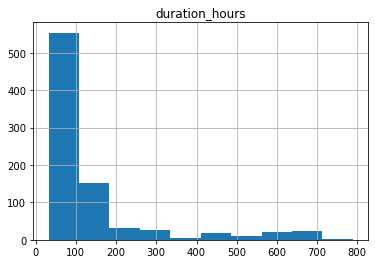

In [263]:
ads_lasting_24hours.hist()

In [77]:
#time_series_sorted_by_group[time_series_sorted_by_group.time_series=='campaign_id_23845255826960549_ad_id_23845265141010549']

,date,time,spend,impressions,clicks,purchase,hour,datetime,time_series
51910,2020-08-17,22:00:00 - 22:59:59,0.00,39,0,0.0,22,2020-08-17 22:00:00,campaign_id_23845255826960549_ad_id_2384526514...
52122,2020-08-17,23:00:00 - 23:59:59,6.37,6989,15,0.0,23,2020-08-17 23:00:00,campaign_id_23845255826960549_ad_id_2384526514...
47283,2020-08-18,00:00:00 - 00:59:59,0.18,157,0,0.0,0,2020-08-18 00:00:00,campaign_id_23845255826960549_ad_id_2384526514...
47491,2020-08-18,01:00:00 - 01:59:59,3.29,2699,4,4.0,1,2020-08-18 01:00:00,campaign_id_23845255826960549_ad_id_2384526514...
47681,2020-08-18,02:00:00 - 02:59:59,4.22,2826,7,1.0,2,2020-08-18 02:00:00,campaign_id_23845255826960549_ad_id_2384526514...
47876,2020-08-18,03:00:00 - 03:59:59,1.81,1350,2,0.0,3,2020-08-18 03:00:00,campaign_id_23845255826960549_ad_id_2384526514...
48066,2020-08-18,04:00:00 - 04:59:59,2.42,1769,5,0.0,4,2020-08-18 04:00:00,campaign_id_23845255826960549_ad_id_2384526514...
48264,2020-08-18,05:00:00 - 05:59:59,6.06,4528,12,0.0,5,2020-08-18 05:00:00,campaign_id_23845255826960549_ad_id_2384526514...
48477,2020-08-18,06:00:00 - 06:59:59,9.17,7298,13,0.0,6,2020-08-18 06:00:00,campaign_id_23845255826960549_ad_id_2384526514...
48686,2020-08-18,07:00:00 - 07:59:59,8.21,6687,12,0.0,7,2020-08-18 07:00:00,campaign_id_23845255826960549_ad_id_2384526514...


In [142]:
#time_series_sorted_by_group[time_series_sorted_by_group.time_series=='campaign_id_23843429400540549_ad_id_23843429400590549']

,date,time,spend,impressions,clicks,purchase,hour,datetime,time_series
1934,2019-06-21,12:00:00 - 12:59:59,0.11,13,1,0.0,12,2019-06-21 12:00:00,campaign_id_23843429400540549_ad_id_2384342940...
2325,2019-06-21,13:00:00 - 13:59:59,0.11,16,0,0.0,13,2019-06-21 13:00:00,campaign_id_23843429400540549_ad_id_2384342940...
2739,2019-06-21,14:00:00 - 14:59:59,0.01,6,1,0.0,14,2019-06-21 14:00:00,campaign_id_23843429400540549_ad_id_2384342940...
3140,2019-06-21,15:00:00 - 15:59:59,0.17,23,0,1.0,15,2019-06-21 15:00:00,campaign_id_23843429400540549_ad_id_2384342940...
3568,2019-06-21,16:00:00 - 16:59:59,0.18,22,0,0.0,16,2019-06-21 16:00:00,campaign_id_23843429400540549_ad_id_2384342940...
4003,2019-06-21,17:00:00 - 17:59:59,0.02,5,1,0.0,17,2019-06-21 17:00:00,campaign_id_23843429400540549_ad_id_2384342940...
4459,2019-06-21,18:00:00 - 18:59:59,0.03,3,0,0.0,18,2019-06-21 18:00:00,campaign_id_23843429400540549_ad_id_2384342940...
4946,2019-06-21,19:00:00 - 19:59:59,0.00,1,0,0.0,19,2019-06-21 19:00:00,campaign_id_23843429400540549_ad_id_2384342940...
5449,2019-06-21,20:00:00 - 20:59:59,0.02,2,0,0.0,20,2019-06-21 20:00:00,campaign_id_23843429400540549_ad_id_2384342940...
6463,2019-06-21,22:00:00 - 22:59:59,0.00,2,0,0.0,22,2019-06-21 22:00:00,campaign_id_23843429400540549_ad_id_2384342940...


In [76]:
time_series_sorted_by_group[time_series_sorted_by_group.time_series=='campaign_id_23845255826960549_ad_id_23845256153090549']

,date,time,spend,impressions,clicks,purchase,hour,datetime,time_series
49802,2020-08-16,12:00:00 - 12:59:59,0.37,229,0,0.0,12,2020-08-16 12:00:00,campaign_id_23845255826960549_ad_id_2384525615...
50020,2020-08-16,13:00:00 - 13:59:59,67.44,25916,101,3.0,13,2020-08-16 13:00:00,campaign_id_23845255826960549_ad_id_2384525615...
50225,2020-08-16,14:00:00 - 14:59:59,62.01,25996,98,0.0,14,2020-08-16 14:00:00,campaign_id_23845255826960549_ad_id_2384525615...
50429,2020-08-16,15:00:00 - 15:59:59,60.59,22726,109,0.0,15,2020-08-16 15:00:00,campaign_id_23845255826960549_ad_id_2384525615...
50633,2020-08-16,16:00:00 - 16:59:59,69.54,22795,124,2.0,16,2020-08-16 16:00:00,campaign_id_23845255826960549_ad_id_2384525615...
50841,2020-08-16,17:00:00 - 17:59:59,76.94,22853,152,3.0,17,2020-08-16 17:00:00,campaign_id_23845255826960549_ad_id_2384525615...
51062,2020-08-16,18:00:00 - 18:59:59,36.45,10182,83,1.0,18,2020-08-16 18:00:00,campaign_id_23845255826960549_ad_id_2384525615...
51271,2020-08-16,19:00:00 - 19:59:59,0.50,139,0,0.0,19,2020-08-16 19:00:00,campaign_id_23845255826960549_ad_id_2384525615...
51477,2020-08-16,20:00:00 - 20:59:59,0.29,98,0,0.0,20,2020-08-16 20:00:00,campaign_id_23845255826960549_ad_id_2384525615...
51687,2020-08-16,21:00:00 - 21:59:59,0.31,81,1,0.0,21,2020-08-16 21:00:00,campaign_id_23845255826960549_ad_id_2384525615...


In [264]:
time_series_first_24hr

,first_hour,last_hour,valid_series
time_series,,,
campaign_id_23843427462090549_ad_id_23843429354180549,2019-06-21 12:00:00,2019-06-22 11:00:00,True
campaign_id_23843427462090549_ad_id_23843429359190549,2019-06-21 12:00:00,2019-06-22 11:00:00,True
campaign_id_23843427462090549_ad_id_23843429359200549,2019-06-21 13:00:00,2019-06-22 12:00:00,True
campaign_id_23843429400540549_ad_id_23843429400560549,2019-06-21 12:00:00,2019-06-22 11:00:00,True
campaign_id_23843429400540549_ad_id_23843429400570549,2019-06-21 12:00:00,2019-06-22 11:00:00,True
...,...,...,...
campaign_id_23845347387450549_ad_id_23845347387470549,2020-08-28 16:00:00,2020-08-29 15:00:00,True
campaign_id_23845373948350549_ad_id_23845373948370549,2020-08-31 13:00:00,2020-09-01 12:00:00,True
campaign_id_23845467764400549_ad_id_23845467764450549,2020-09-09 02:00:00,2020-09-10 01:00:00,True


In [265]:
time_series_first_24hr[time_series_first_24hr.index==group_name]

,first_hour,last_hour,valid_series
time_series,,,
campaign_id_23846541892040549_ad_id_23846541892100549,2021-01-18 22:00:00,2021-01-19 21:00:00,True


In [227]:
time_series_start_hour[time_series_start_hour['time_series']=='campaign_id_23843490210650549_ad_id_23843490213720549'].datetime+ timedelta(hours=24)

20   2019-07-17 07:00:00
Name: datetime, dtype: datetime64[ns]

In [266]:
#grouped_time_series.get_group("campaign_id_23843490210650549_ad_id_23843490213720549")
index = 1
potential_series = list(ads_lasting_n_hours.time_series.values)
prepared_df = None

for group_name,series in grouped_time_series:
    #print(series.time_series.values)
    
    if group_name in potential_series:
        print(index, group_name, series.shape[0])  

        last_hour = time_series_first_24hr[time_series_first_24hr.index == group_name].last_hour
        series=series.set_index('datetime') 
        series = series.resample('H').asfreq()
        series['time_series'] = group_name
        series.drop(['date', 'time'], axis=1, inplace=True)
        series = series.fillna(0).reset_index()
        series['first_24_hour'] = series.apply(lambda row: row.datetime<=last_hour, axis=1 )
        
        prepared_df = series if index==1 else prepared_df.append(series)
        index+=1

1 campaign_id_23843427462090549_ad_id_23843429354180549 59
2 campaign_id_23843427462090549_ad_id_23843429359190549 60
3 campaign_id_23843427462090549_ad_id_23843429359200549 23
4 campaign_id_23843429400540549_ad_id_23843429400560549 11
5 campaign_id_23843429400540549_ad_id_23843429400570549 59
6 campaign_id_23843429400540549_ad_id_23843429400590549 40
7 campaign_id_23843437921360549_ad_id_23843437921420549 252
8 campaign_id_23843437921380549_ad_id_23843437921400549 236
9 campaign_id_23843437921380549_ad_id_23843437921450549 226
10 campaign_id_23843490210650549_ad_id_23843490212110549 32
11 campaign_id_23843490210650549_ad_id_23843490212120549 312
12 campaign_id_23843490210650549_ad_id_23843490212130549 24
13 campaign_id_23843490210650549_ad_id_23843490212450549 30
14 campaign_id_23843490210650549_ad_id_23843490212460549 40
15 campaign_id_23843490210650549_ad_id_23843490212830549 29
16 campaign_id_23843490210650549_ad_id_23843490213000549 38
17 campaign_id_23843490210650549_ad_id_238434

138 campaign_id_23843490224560549_ad_id_23843490227190549 23
139 campaign_id_23843490224560549_ad_id_23843490227240549 114
140 campaign_id_23843490224560549_ad_id_23843490227340549 99
141 campaign_id_23843490224560549_ad_id_23843490227390549 8
142 campaign_id_23843490224560549_ad_id_23843490227470549 21
143 campaign_id_23843490224560549_ad_id_23843490228150549 118
144 campaign_id_23843490224560549_ad_id_23843490228210549 175
145 campaign_id_23843490224560549_ad_id_23843490228220549 146
146 campaign_id_23843490224560549_ad_id_23843490228320549 28
147 campaign_id_23843490224560549_ad_id_23843490228450549 17
148 campaign_id_23843490224560549_ad_id_23843490228880549 104
149 campaign_id_23843490224560549_ad_id_23843490228890549 25
150 campaign_id_23843490224560549_ad_id_23843490228930549 122
151 campaign_id_23843490224560549_ad_id_23843490229010549 6
152 campaign_id_23843490224560549_ad_id_23843490229220549 14
153 campaign_id_23843490224560549_ad_id_23843490229530549 24
154 campaign_id_2384

274 campaign_id_23843769769110549_ad_id_23843769799520549 16
275 campaign_id_23843769769110549_ad_id_23843769799530549 33
276 campaign_id_23843769769110549_ad_id_23843769799750549 8
277 campaign_id_23843769769110549_ad_id_23843769800430549 248
278 campaign_id_23843769769110549_ad_id_23843769800450549 65
279 campaign_id_23843769769110549_ad_id_23843769800530549 28
280 campaign_id_23843769769110549_ad_id_23843769800560549 15
281 campaign_id_23843769769110549_ad_id_23843769800930549 36
282 campaign_id_23843769769110549_ad_id_23843769801540549 183
283 campaign_id_23843769769110549_ad_id_23843769801710549 13
284 campaign_id_23843769769110549_ad_id_23843769801760549 183
285 campaign_id_23843769769110549_ad_id_23843769801980549 328
286 campaign_id_23843769769110549_ad_id_23843769802650549 30
287 campaign_id_23843769769110549_ad_id_23843769802670549 18
288 campaign_id_23843769769110549_ad_id_23843769802780549 204
289 campaign_id_23843769769110549_ad_id_23843769802860549 57
290 campaign_id_2384

416 campaign_id_23843769822320549_ad_id_23843769841680549 23
417 campaign_id_23843769822320549_ad_id_23843769843330549 5
418 campaign_id_23843769822320549_ad_id_23843769843400549 11
419 campaign_id_23843769822320549_ad_id_23843769843460549 2
420 campaign_id_23843769822320549_ad_id_23843769843470549 13
421 campaign_id_23843769822320549_ad_id_23843769843560549 46
422 campaign_id_23843769822320549_ad_id_23843769844550549 50
423 campaign_id_23843769822320549_ad_id_23843769844600549 111
424 campaign_id_23843769822320549_ad_id_23843769844740549 46
425 campaign_id_23843769822320549_ad_id_23843769844750549 57
426 campaign_id_23843769822320549_ad_id_23843769844760549 115
427 campaign_id_23843769822320549_ad_id_23843769845390549 41
428 campaign_id_23843769822320549_ad_id_23843769845400549 11
429 campaign_id_23843769822320549_ad_id_23843769845420549 69
430 campaign_id_23843769822320549_ad_id_23843769845550549 22
431 campaign_id_23843769822320549_ad_id_23843769845840549 118
432 campaign_id_2384376

561 campaign_id_23844530190320549_ad_id_23844535360650549 40
562 campaign_id_23844530190320549_ad_id_23844535406240549 33
563 campaign_id_23844530190320549_ad_id_23844535406250549 38
564 campaign_id_23844530190320549_ad_id_23844535406260549 7
565 campaign_id_23844530190320549_ad_id_23844535406270549 27
566 campaign_id_23844530190320549_ad_id_23844535406280549 8
567 campaign_id_23844530190320549_ad_id_23844535406320549 41
568 campaign_id_23844530190320549_ad_id_23844535406330549 9
569 campaign_id_23844530190320549_ad_id_23844535406340549 3
570 campaign_id_23844530190320549_ad_id_23844535406350549 35
571 campaign_id_23844530190320549_ad_id_23844535406360549 12
572 campaign_id_23844530190320549_ad_id_23844535406370549 10
573 campaign_id_23844530190320549_ad_id_23844535406380549 26
574 campaign_id_23844530190320549_ad_id_23844535406390549 28
575 campaign_id_23844530190320549_ad_id_23844535406400549 40
576 campaign_id_23844530190320549_ad_id_23844535406410549 8
577 campaign_id_2384453019032

700 campaign_id_23844530214060549_ad_id_23844531745400549 28
701 campaign_id_23844530214060549_ad_id_23844531746190549 40
702 campaign_id_23844530214060549_ad_id_23844535454630549 38
703 campaign_id_23844530214060549_ad_id_23844535454650549 9
704 campaign_id_23844530214060549_ad_id_23844535454670549 4
705 campaign_id_23844530214060549_ad_id_23844535454680549 12
706 campaign_id_23844530214060549_ad_id_23844535454690549 44
707 campaign_id_23844530214060549_ad_id_23844535454700549 29
708 campaign_id_23844530214060549_ad_id_23844535454710549 22
709 campaign_id_23844530214060549_ad_id_23844535454730549 23
710 campaign_id_23844530214060549_ad_id_23844535454750549 7
711 campaign_id_23844530214060549_ad_id_23844535454760549 41
712 campaign_id_23844530214060549_ad_id_23844535454770549 21
713 campaign_id_23844530214060549_ad_id_23844535454780549 32
714 campaign_id_23844530214060549_ad_id_23844535454790549 12
715 campaign_id_23844530214060549_ad_id_23844535454830549 107
716 campaign_id_2384453021

837 campaign_id_23845069585730549_ad_id_23845069588770549 5
838 campaign_id_23845069585730549_ad_id_23845069590880549 2
839 campaign_id_23845069585730549_ad_id_23845069592250549 163
840 campaign_id_23845069585730549_ad_id_23845069592730549 7
841 campaign_id_23845069585730549_ad_id_23845069593900549 6
842 campaign_id_23845069585730549_ad_id_23845069595250549 44
843 campaign_id_23845069585730549_ad_id_23845069596210549 3
844 campaign_id_23845069585730549_ad_id_23845069597590549 4
845 campaign_id_23845069585730549_ad_id_23845069597950549 2
846 campaign_id_23845069585730549_ad_id_23845069598380549 4
847 campaign_id_23845069585730549_ad_id_23845069598840549 5
848 campaign_id_23845069585730549_ad_id_23845069602070549 5
849 campaign_id_23845069585730549_ad_id_23845069952060549 134
850 campaign_id_23845069585730549_ad_id_23845069958820549 387
851 campaign_id_23845069585730549_ad_id_23845069990720549 5
852 campaign_id_23845069585730549_ad_id_23845069996070549 4
853 campaign_id_23845069585730549

In [231]:
prepared_df[prepared_df.time_series=='campaign_id_23843490210650549_ad_id_23843490213720549'].sort_values('datetime').iloc[:26]

,datetime,spend,impressions,clicks,purchase,hour,time_series,first_24_hour
0,2019-07-16 07:00:00,0.02,1.0,0.0,0.0,7.0,campaign_id_23843490210650549_ad_id_2384349021...,True
1,2019-07-16 08:00:00,0.00,0.0,0.0,0.0,0.0,campaign_id_23843490210650549_ad_id_2384349021...,True
2,2019-07-16 09:00:00,0.00,0.0,0.0,0.0,0.0,campaign_id_23843490210650549_ad_id_2384349021...,True
3,2019-07-16 10:00:00,0.00,0.0,0.0,0.0,0.0,campaign_id_23843490210650549_ad_id_2384349021...,True
4,2019-07-16 11:00:00,0.00,0.0,0.0,0.0,0.0,campaign_id_23843490210650549_ad_id_2384349021...,True
5,2019-07-16 12:00:00,0.00,0.0,0.0,0.0,0.0,campaign_id_23843490210650549_ad_id_2384349021...,True
6,2019-07-16 13:00:00,0.00,0.0,0.0,0.0,0.0,campaign_id_23843490210650549_ad_id_2384349021...,True
7,2019-07-16 14:00:00,0.00,0.0,0.0,0.0,0.0,campaign_id_23843490210650549_ad_id_2384349021...,True
8,2019-07-16 15:00:00,0.00,0.0,0.0,0.0,0.0,campaign_id_23843490210650549_ad_id_2384349021...,True
9,2019-07-16 16:00:00,0.00,1.0,0.0,0.0,16.0,campaign_id_23843490210650549_ad_id_2384349021...,True


In [268]:
df[df.time_series=='campaign_id_23843490210650549_ad_id_23843490213720549'].spend.sum()

1.4900000000000002

In [271]:
missed_purchase_infos = df[(~df.time_series.isin(prepared_df.time_series.unique())) &(df.purchase>0)]
missed_purchase_infos.time_series.values

array(['campaign_id_23845255826960549_ad_id_23845265141010549',
       'campaign_id_23845255826960549_ad_id_23845265141010549',
       'campaign_id_23845255826960549_ad_id_23845256153090549',
       'campaign_id_23845255826960549_ad_id_23845256153090549',
       'campaign_id_23845255826960549_ad_id_23845256153090549',
       'campaign_id_23845255826960549_ad_id_23845256153090549'],
      dtype=object)

## Relationships

In [157]:
df[['spend', 'impressions', 'clicks', 'purchase']].corr(method ='pearson')

,spend,impressions,clicks,purchase
spend,1.000000,0.516785,0.732774,0.143057
impressions,0.516785,1.000000,0.593074,0.018136
clicks,0.732774,0.593074,1.000000,0.110510
purchase,0.143057,0.018136,0.110510,1.000000


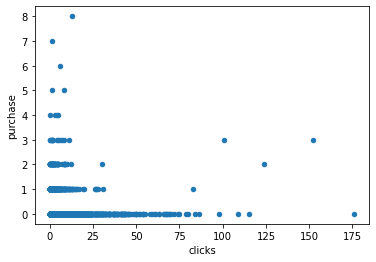

In [37]:
#purchase and clicks has sort of negative relationship
df[['clicks', 'purchase']].plot.scatter(x = 'clicks', y = 'purchase');

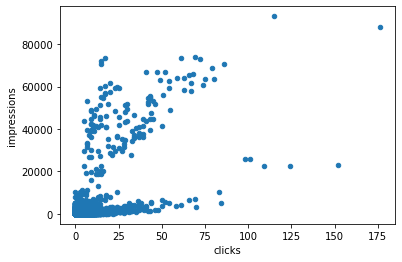

In [38]:
#views and clicks has positive relationship
df[['clicks', 'impressions']].plot.scatter(x = 'clicks', y = 'impressions');

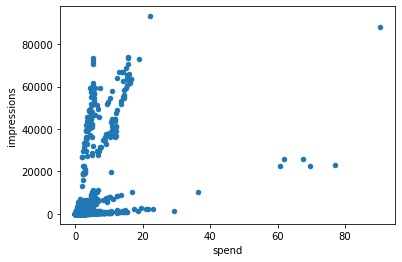

In [39]:
#spend and impressions has positive relationship
df[['spend', 'impressions']].plot.scatter(x = 'spend', y = 'impressions');

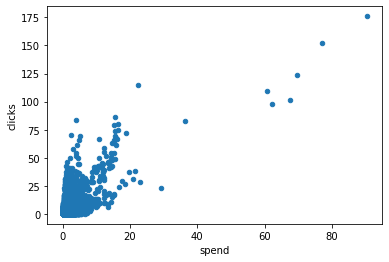

In [40]:
#spend and clicks has positive relationship
df[['spend', 'clicks']].plot.scatter(x = 'spend', y = 'clicks');

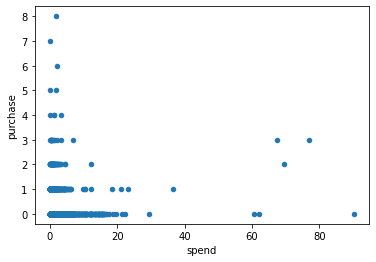

In [41]:
#spend and clicks has positive relationship
df[['spend', 'purchase']].plot.scatter(x = 'spend', y = 'purchase');

### Relationships with purchase

In [21]:
purchased_ads = df[df.purchase>0][['ad_id','date']]
purchased_ads

,ad_id,date
304,23843490229620549,2019-08-11
337,23843437921450549,2019-06-30
353,23843490216990549,2019-07-16
576,23843490230190549,2019-07-21
709,23843490236750549,2019-08-03
...,...,...
52672,23843490232290549,2019-07-16
53512,23843490229620549,2019-08-04
53905,23843490217190549,2019-07-17
54168,23843490215490549,2019-08-10


In [145]:
df[df.ad_id==23843490229620549].sort_values(['date', 'time'])

,campaign_id,ad_id,date,time,spend,impressions,clicks,purchase,month,year,quarter,dayofweek,hour
4524,23843490224560549,23843490229620549,2019-07-15,18:00:00 - 18:59:59,0.00,2,1,0.0,0,2019,1,0,18
5012,23843490224560549,23843490229620549,2019-07-15,19:00:00 - 19:59:59,0.07,18,0,0.0,0,2019,1,0,19
5502,23843490224560549,23843490229620549,2019-07-15,20:00:00 - 20:59:59,0.06,20,0,0.0,0,2019,1,0,20
6002,23843490224560549,23843490229620549,2019-07-15,21:00:00 - 21:59:59,0.03,12,0,0.0,0,2019,1,0,21
6512,23843490224560549,23843490229620549,2019-07-15,22:00:00 - 22:59:59,0.04,9,1,0.0,0,2019,1,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,23843490224560549,23843490229620549,2019-08-11,15:00:00 - 15:59:59,6.89,833,8,3.0,6,2019,2,6,15
3986,23843490224560549,23843490229620549,2019-08-11,16:00:00 - 16:59:59,7.26,1037,8,0.0,6,2019,2,6,16
4443,23843490224560549,23843490229620549,2019-08-11,17:00:00 - 17:59:59,2.96,419,1,0.0,6,2019,2,6,17
4927,23843490224560549,23843490229620549,2019-08-11,18:00:00 - 18:59:59,2.13,284,3,0.0,6,2019,2,6,18


In [27]:
# Click has the highest and positive relationship with purchase
df.corr(method ='pearson').iloc[4: , :3]

,campaign_id,ad_id,spend
clicks,0.253196,0.252568,0.732774
purchase,0.013226,0.013221,0.143057


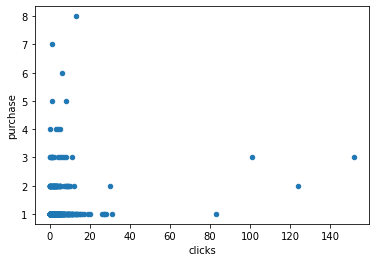

In [29]:
compare_column = 'clicks'
purchase_info[[compare_column, 'purchase']].plot.scatter(x = compare_column, y = 'purchase');

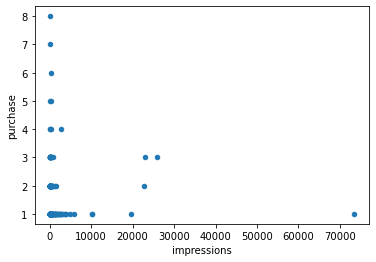

In [30]:
compare_column = 'impressions'
purchase_info[[compare_column, 'purchase']].plot.scatter(x = compare_column, y = 'purchase');

### Possible Metric
https://www.monetizemore.com/blog/what-is-the-best-metric-to-measure-ad-performance/